In [113]:
# imports
import numpy as np
import pandas as pd
import plotly.express as px

In [114]:
# dataset
population = (pd.read_csv("C:/Users/gael.lisador/Desktop/Hackathon/datavizreunion/population-francaise-communespublic.csv",encoding="ISO-8859-1",
                 sep="\t", na_values="-")
           .fillna(0)
          )

population.head()

,Code région,Nom de la région,Code département,Code arrondissement départemental,Code canton,Code_commune,Nom de la commune,Population municipale,Population comptée à part,Population totale,...,Code INSEE (commune ou arrondissement),Superficie de la commune,Statut,Code INSEE de la commune,Nom de la commune IGN,Nom du département IGN,Nom de la région.1,Code EPCI,Code EPCI.1,EPCI
0,4,La Réunion,974,3,31,419,Sainte-Rose,6809,71,6880,...,97419,178.21,Commune,97419,Sainte-Rose,LA REUNION,LA REUNION,0.0,0.0,0
1,4,La Réunion,974,2,5,405,Petite-Île,11582,109,11691,...,97405,33.83,Commune,97405,Petite-Île,LA REUNION,LA REUNION,0.0,0.0,0
2,4,La Réunion,974,3,6,402,Bras-Panon,12616,151,12767,...,97402,87.26,Commune,97402,Bras-Panon,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est
3,4,La Réunion,974,3,8,419,Sainte-Rose,6782,85,6867,...,97419,178.21,Commune,97419,Sainte-Rose,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est
4,4,La Réunion,974,3,90,410,Saint-Benoît,35733,238,35971,...,97410,229.79,Commune,97410,Saint-Benoît,LA REUNION,LA REUNION,0.0,0.0,0


In [115]:
'treemap : Répartition de la population/commune/arrondissemnt departementale'

'treemap : Répartition de la population/commune/arrondissemnt departementale'

In [116]:
# liste des "Code Département"
codes2 = sorted(population["Code arrondissement départemental"].unique())
print(*codes2)

1 2 3 4


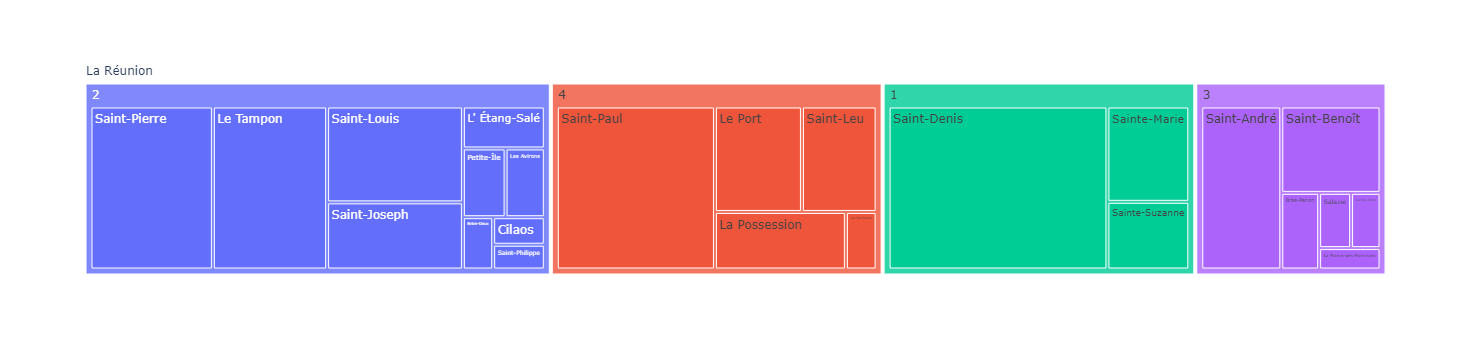

In [117]:
# treemap
px.treemap(population,
          path=["Nom de la région","Code arrondissement départemental","Nom de la commune"],
          values="Population totale")

In [118]:
'Sunburst : Répartition de la population/commune/arrondissemnt departementale'

'Sunburst : Répartition de la population/commune/arrondissemnt departementale'

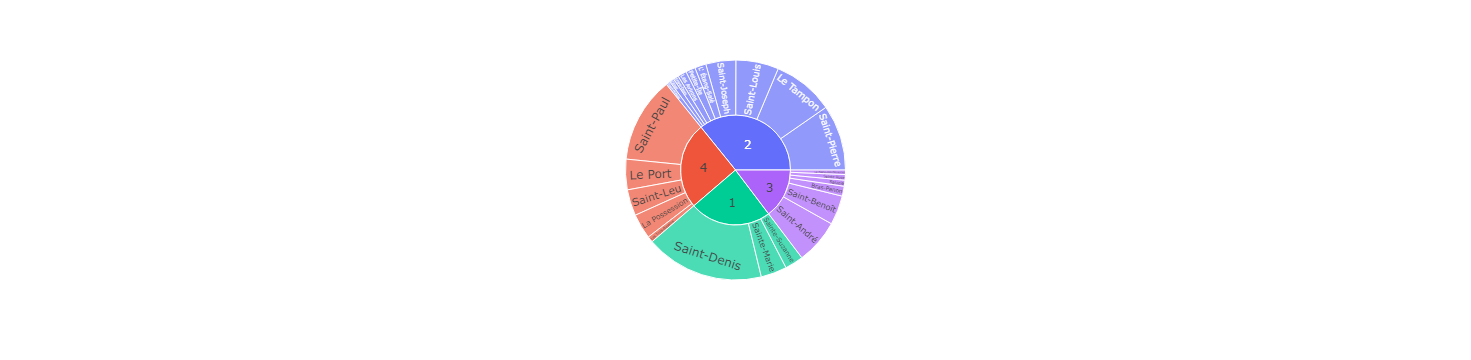

In [119]:
# sunburst
px.sunburst(population,
          path=["Code arrondissement départemental","Nom de la commune"],
          values="Population totale")

In [120]:
import json

with open("C:/Users/gael.lisador/Desktop/Hackathon/datavizreunion/communes-974-la-reunion.geojson") as f:
    communes = json.loads(f.read())

communes

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[55.38596, -21.18588],
      [55.38576, -21.18552],
      [55.38605, -21.17821],
      [55.38703, -21.17687],
      [55.38513, -21.17701],
      [55.38399, -21.17879],
      [55.38346, -21.18073],
      [55.38235, -21.18155],
      [55.38231, -21.18332],
      [55.38066, -21.18809],
      [55.37902, -21.19035],
      [55.37902, -21.19193],
      [55.37979, -21.19301],
      [55.38013, -21.19451],
      [55.37978, -21.19584],
      [55.37835, -21.1976],
      [55.37862, -21.20002],
      [55.37834, -21.20163],
      [55.37757, -21.20308],
      [55.37463, -21.20489],
      [55.37396, -21.20566],
      [55.37364, -21.20742],
      [55.37171, -21.20853],
      [55.37067, -21.21085],
      [55.37064, -21.21287],
      [55.36793, -21.21296],
      [55.36577, -21.21558],
      [55.36316, -21.2163],
      [55.36213, -21.21632],
      [55.35978, -21.21868],
      [55.35836, -

In [121]:
# liste des valeurs de la clé "code"
codes = sorted([f["properties"]["code"] for f in communes["features"]])
print(codes)

['97401', '97402', '97403', '97404', '97405', '97406', '97407', '97408', '97409', '97410', '97411', '97412', '97413', '97414', '97415', '97416', '97417', '97418', '97419', '97420', '97421', '97422', '97423', '97424']


In [122]:
# dataset + '97' à Code_commune converti int
population["Code_commune"] = '97' + population["Code_commune"].astype(str)
population["Code_commune"] = population["Code_commune"].astype(int)
population.head()

,Code région,Nom de la région,Code département,Code arrondissement départemental,Code canton,Code_commune,Nom de la commune,Population municipale,Population comptée à part,Population totale,...,Code INSEE (commune ou arrondissement),Superficie de la commune,Statut,Code INSEE de la commune,Nom de la commune IGN,Nom du département IGN,Nom de la région.1,Code EPCI,Code EPCI.1,EPCI
0,4,La Réunion,974,3,31,97419,Sainte-Rose,6809,71,6880,...,97419,178.21,Commune,97419,Sainte-Rose,LA REUNION,LA REUNION,0.0,0.0,0
1,4,La Réunion,974,2,5,97405,Petite-Île,11582,109,11691,...,97405,33.83,Commune,97405,Petite-Île,LA REUNION,LA REUNION,0.0,0.0,0
2,4,La Réunion,974,3,6,97402,Bras-Panon,12616,151,12767,...,97402,87.26,Commune,97402,Bras-Panon,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est
3,4,La Réunion,974,3,8,97419,Sainte-Rose,6782,85,6867,...,97419,178.21,Commune,97419,Sainte-Rose,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est
4,4,La Réunion,974,3,90,97410,Saint-Benoît,35733,238,35971,...,97410,229.79,Commune,97410,Saint-Benoît,LA REUNION,LA REUNION,0.0,0.0,0


In [123]:
codes2 = sorted(population["Code_commune"].unique())
print(*codes2)

97401 97402 97403 97404 97405 97406 97407 97408 97409 97410 97411 97412 97413 97414 97415 97416 97417 97418 97419 97420 97421 97422 97423 97424


In [124]:
# population des départements
df = (population.groupby("Code_commune", as_index=False)["Population totale"]
      .sum()
     )
df["Nom de la commune"] = population["Nom de la commune"].astype(str)
df["Année recensement"] = population["Année recensement"].astype(int)

df = df.rename(columns={"Année recensement": 'Année'})
df.head()

,Code_commune,Population totale,Nom de la commune,Année
0,97401,119538,Sainte-Rose,2008
1,97402,133642,Petite-Île,2009
2,97403,70281,Bras-Panon,2013
3,97404,152391,Sainte-Rose,2013
4,97405,130205,Saint-Benoît,2011


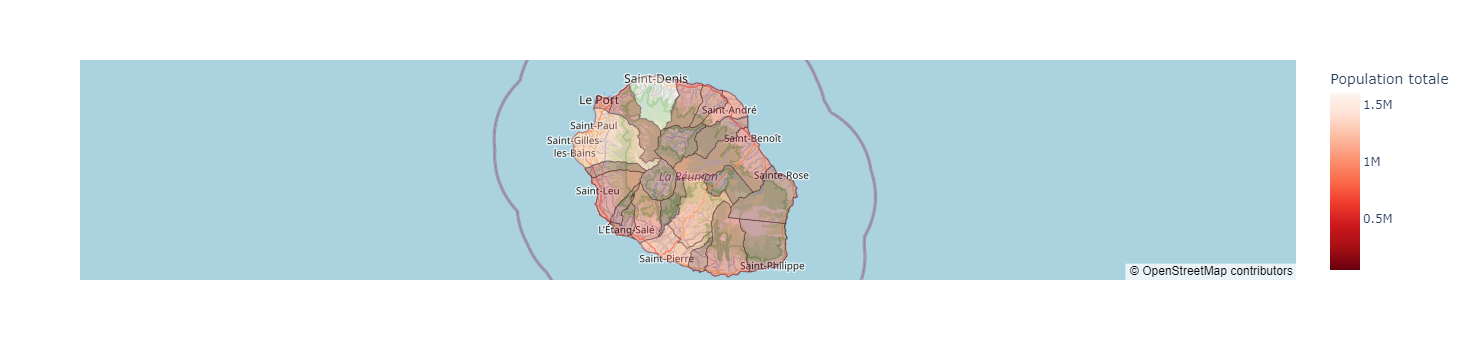

In [125]:
# choropleth_mapbox
px.choropleth_mapbox(data_frame=df,
                     geojson=communes,
                     locations='Code_commune',
                     color='Population totale',
                     featureidkey='properties.code',
                     color_continuous_scale="reds_r",
                     mapbox_style="open-street-map",
                     zoom=8.0,
                     center = {"lat": -21.115141, "lon": 55.536384},
                     opacity=0.3,
                     labels={'Population totale': 'Population totale'}
                    )

In [126]:
# dataset
demandeur = (pd.read_csv("C:/Users/gael.lisador/Desktop/Hackathon/datavizreunion/demandeurs-d-emploi-inscrits-a-pole-emploi-par-commune-a-la-reunion.csv",
                 sep=";", na_values="-")
          )
demandeur = demandeur.rename(columns={"nombre d'inscrits": 'NB inscrit PE'})
demandeur.head()

,code postal,date,NB inscrit PE,Code_commune_INSEE,Nom_commune
0,97412,2016-10-31,2530,97402,BRAS PANON
1,97412,2017-02-28,2480,97402,BRAS PANON
2,97412,2017-03-31,2490,97402,BRAS PANON
3,97412,2017-05-31,2460,97402,BRAS PANON
4,97412,2017-08-31,2530,97402,BRAS PANON


In [127]:
# liste des "Code Département"
codes3 = sorted(demandeur["Code_commune_INSEE"].unique())
print(*codes3)

97401 97402 97403 97404 97405 97406 97407 97408 97409 97410 97411 97412 97413 97415 97416 97417 97418 97419 97420 97421 97422 97423 97424


In [128]:
# population des départements
df3 = (demandeur.groupby("Code_commune_INSEE", as_index=False)["NB inscrit PE"]
      .sum()
     )
df3 = df3.rename(columns={'Code_commune_INSEE': 'Code_commune'})
df3.head()

,Code_commune,NB inscrit PE
0,97401,169160
1,97402,189530
2,97403,112640
3,97404,234050
4,97405,199790


In [191]:
df4 = pd.merge(df, df3)
df4.head()

,Code_commune,Population totale,Nom de la commune,Année,NB inscrit PE
0,97401,119538,Sainte-Rose,2008,169160
1,97402,133642,Petite-Île,2009,189530
2,97403,70281,Bras-Panon,2013,112640
3,97404,152391,Sainte-Rose,2013,234050
4,97405,130205,Saint-Benoît,2011,199790


In [190]:
# dataset
personne_decede = (pd.read_csv("C:/Users/gael.lisador/Desktop/Hackathon/datavizreunion/liste-des-personnes-decedees-en-france-collectees-depuis-1970.csv",sep=",", na_values="-")
                   .loc[lambda df_: df_["Code Source Commune Décès"].str.startswith("97", na=False)]
                   
         )

personne_decede['nb'] = 1
personne_decede.head()

,Nom,Prénoms,Sexe,Date Naissance,Date Décès,Pays Source Naissance,Code Source Commune Naissance,Nom Source Commune Naissance,Code Actuel Commune Naissance,Nom Actuel Commune Naissance,...,Code Actuel Commune Décès,Nom Actuel Commune Décès,Code Actuel Département Décès,Nom Actuel Département Décès,Code Actuel Région Décès,Nom Actuel Région Décès,Numéro d'acte du décès,Nom du fichier source INSEE,Age,nb
0,DERAND,CLAUDE MAX MARY BOTA,M,1927-06-03,2005-04-17,REUNION,97408.0,LA POSSESSION,97408,La Possession,...,97408,La Possession,974,La Réunion,4,La Réunion,16,deces-2005.txt,77,1
1,DEFAUD,ANTOINE ANDREA,M,1919-04-28,2005-04-19,REUNION,97403.0,ENTRE-DEUX,97403,Entre-Deux,...,97411,Saint-Denis,974,La Réunion,4,La Réunion,299,deces-2005.txt,85,1
2,MURAT,MARIE LOUISANNE ROSE,F,1922-01-09,2005-04-26,REUNION,97422.0,TAMPON,97422,Le Tampon,...,97410,Saint-Benoît,974,La Réunion,4,La Réunion,79,deces-2005.txt,83,1
5,RHARUS,IGNACE,M,1924-06-22,2005-04-05,REUNION,97415.0,SAINT-PAUL,97415,Saint-Paul,...,97411,Saint-Denis,974,La Réunion,4,La Réunion,259,deces-2005.txt,80,1
6,IMBOLA,JUSTIN,M,1954-09-28,2005-04-04,REUNION,97418.0,SAINTE-MARIE,97418,Sainte-Marie,...,97411,Saint-Denis,974,La Réunion,4,La Réunion,258,deces-2005.txt,50,1


In [131]:
# liste des "Code Département"
codes4 = sorted(personne_decede["Code Source Commune Décès"].unique())
print(*codes4)

97101 97103 97105 97106 97107 97108 97109 97112 97113 97115 97116 97117 97118 97120 97124 97125 97126 97128 97129 97206 97207 97209 97210 97211 97213 97216 97217 97218 97219 97221 97222 97223 97224 97225 97226 97228 97230 97231 97233 97302 97304 97305 97307 97308 97309 97311 97313 97401 97402 97403 97404 97405 97406 97407 97408 97409 97410 97411 97412 97413 97414 97415 97416 97417 97418 97419 97420 97421 97422 97423 97424 97502 97602 97603 97605 97609 97610 97611 97612 97614 97615 97617 97801


In [189]:
# population des départements
import datetime as dt
df5 = (personne_decede.groupby("Code Source Commune Décès", as_index=False)["nb"]
      .sum()
     )
df5 = df5.rename(columns={'Code Source Commune Décès': 'Code_commune','nb': 'Nombre de Décès'})
df5.head()

,Code_commune,Nombre de Décès
0,97101,44
1,97103,4
2,97105,6
3,97106,1
4,97107,2


In [204]:
df5["Code_commune"] = df5["Code_commune"].astype(int)
df6 = pd.merge(df4, df5)
df6.head()

,Code_commune,Population totale,Nom de la commune,Année,NB inscrit PE,Nombre de Décès
0,97401,119538,Sainte-Rose,2008,169160,871
1,97402,133642,Petite-Île,2009,189530,1044
2,97403,70281,Bras-Panon,2013,112640,915
3,97404,152391,Sainte-Rose,2013,234050,1251
4,97405,130205,Saint-Benoît,2011,199790,1293


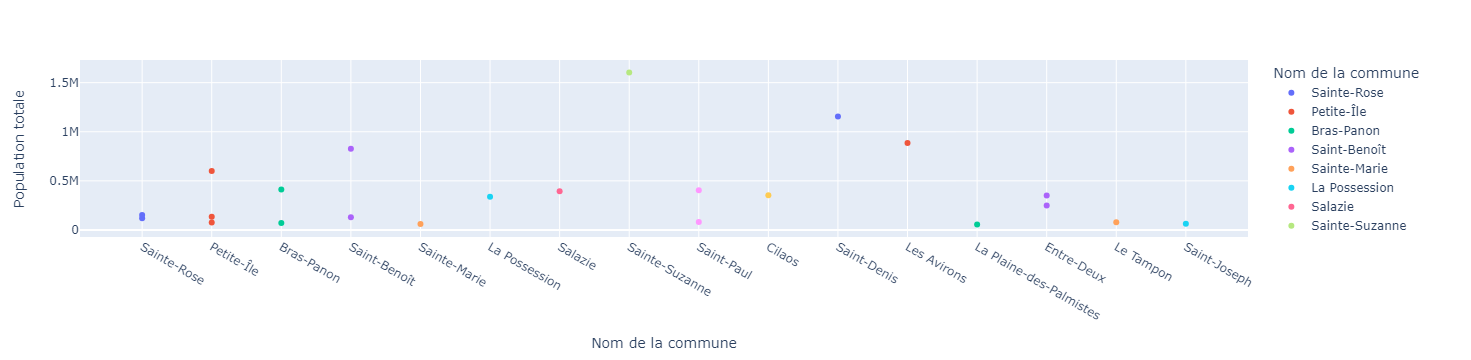

In [134]:
fig = px.scatter(df6, x="Nom de la commune", y="Population totale", color='Nom de la commune')
fig.show()

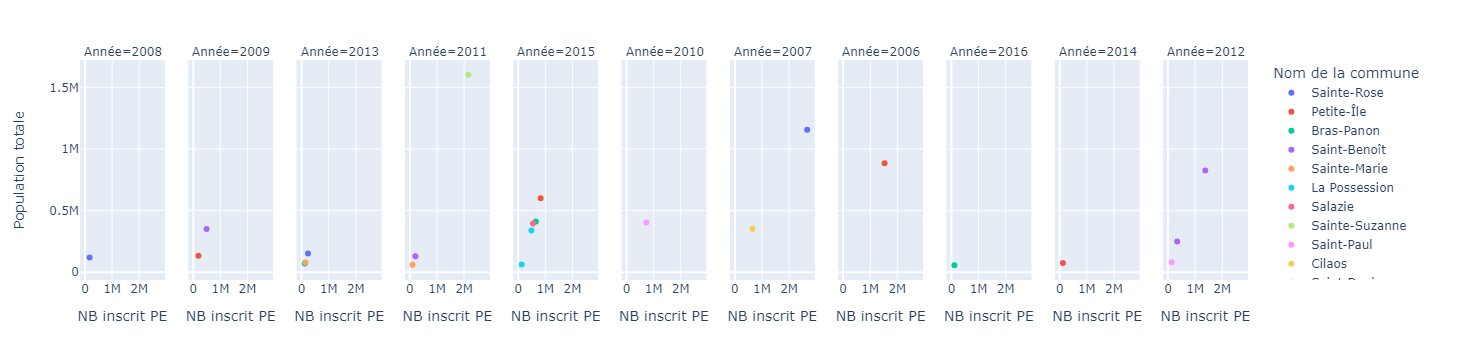

In [135]:
fig = px.scatter(df6, x="NB inscrit PE", y="Population totale", color="Nom de la commune", facet_col="Année", )
fig.show()

In [136]:
# let's add color by lifeExp and other parameters 
#fig = px.bar(df6, x='Année', y='Population totale', color='Nom de la commune', labels={'Population totale': 'Population'}, height=400)
#fig.show() 
df6.head()

,Code_commune,Population totale,Nom de la commune,Année,NB inscrit PE,Nombre de Décès
0,97401,119538,Sainte-Rose,2008,169160,871
1,97402,133642,Petite-Île,2009,189530,1044
2,97403,70281,Bras-Panon,2013,112640,915
3,97404,152391,Sainte-Rose,2013,234050,1251
4,97405,130205,Saint-Benoît,2011,199790,1293


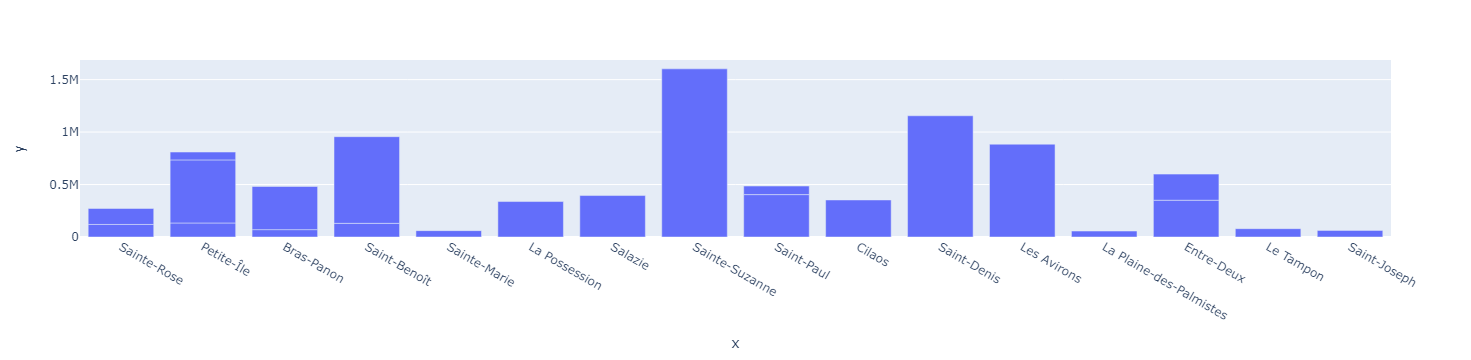

In [137]:
fig = px.bar(x=df6['Nom de la commune'], y=df6['Population totale'])
fig.show()

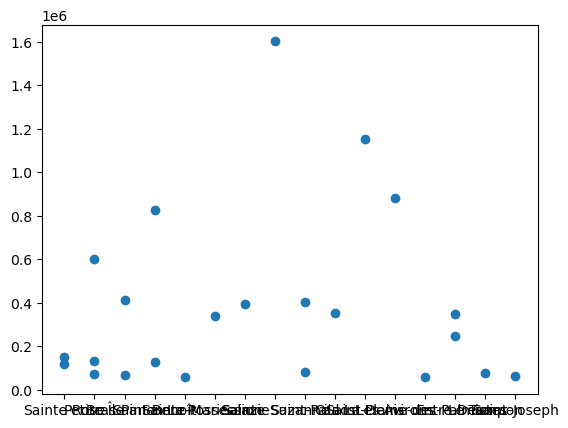

In [138]:
import matplotlib.pyplot as plt

# Sample data
x = df6['Nom de la commune']
y = df6['Population totale']

# Create scatter plot
plt.scatter(x, y)
plt.show()

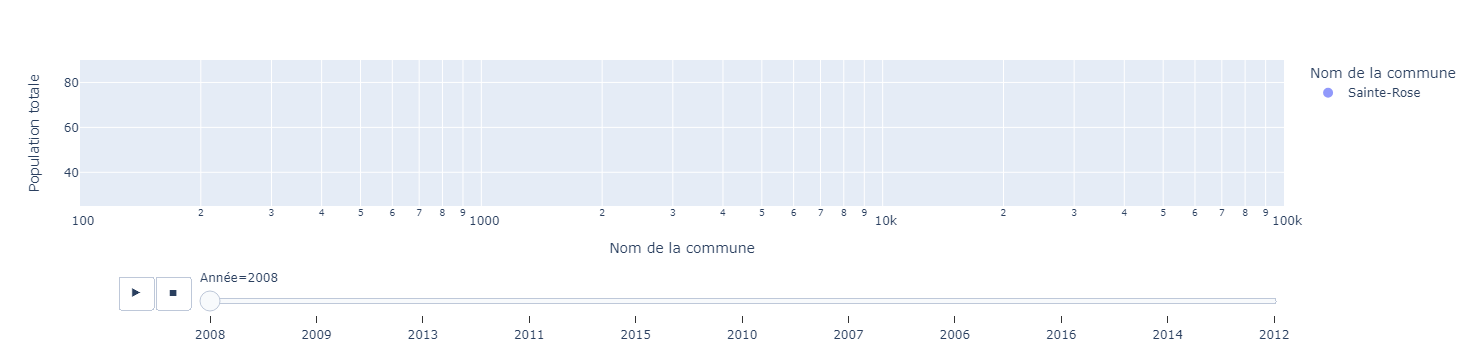

In [139]:
import plotly.express as px

px.scatter(df6, x="Nom de la commune", y="Population totale", animation_frame="Année", animation_group="Code_commune",
           size="Population totale", color="Nom de la commune", hover_name="Nom de la commune",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

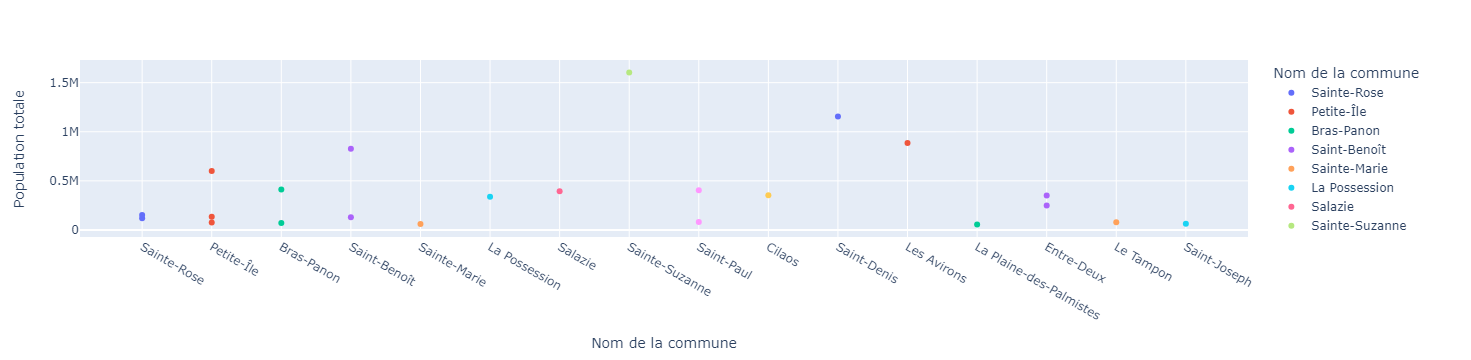

In [140]:
fig = px.scatter(df6, x="Nom de la commune", y="Population totale", color='Nom de la commune')
fig.show()

In [141]:
population[0:100]

,Code région,Nom de la région,Code département,Code arrondissement départemental,Code canton,Code_commune,Nom de la commune,Population municipale,Population comptée à part,Population totale,...,Code INSEE (commune ou arrondissement),Superficie de la commune,Statut,Code INSEE de la commune,Nom de la commune IGN,Nom du département IGN,Nom de la région.1,Code EPCI,Code EPCI.1,EPCI
0,4,La Réunion,974,3,31,97419,Sainte-Rose,6809,71,6880,...,97419,178.21,Commune,97419,Sainte-Rose,LA REUNION,LA REUNION,0.0,0.0,0
1,4,La Réunion,974,2,5,97405,Petite-Île,11582,109,11691,...,97405,33.83,Commune,97405,Petite-Île,LA REUNION,LA REUNION,0.0,0.0,0
2,4,La Réunion,974,3,6,97402,Bras-Panon,12616,151,12767,...,97402,87.26,Commune,97402,Bras-Panon,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est
3,4,La Réunion,974,3,8,97419,Sainte-Rose,6782,85,6867,...,97419,178.21,Commune,97419,Sainte-Rose,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est
4,4,La Réunion,974,3,90,97410,Saint-Benoît,35733,238,35971,...,97410,229.79,Commune,97410,Saint-Benoît,LA REUNION,LA REUNION,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,La Réunion,974,3,92,97410,Saint-Benoît,37940,347,38287,...,97410,229.79,Commune,97410,Saint-Benoît,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est (Cirest)
96,4,La Réunion,974,1,93,97411,Saint-Denis,147920,1417,149337,...,97411,141.50,Commune,97411,Saint-Denis,LA REUNION,LA REUNION,249740119.0,249740119.0,CA Intercommunale du Nord de la Réunion (Cinor)
97,4,La Réunion,974,4,95,97413,Saint-Leu,33697,463,34160,...,97413,118.08,Commune,97413,Saint-Leu,LA REUNION,LA REUNION,249740101.0,249740101.0,CA Territoire de la Côte Ouest (Tco)
98,4,La Réunion,974,2,5,97405,Petite-Île,11564,99,11663,...,97405,33.83,Commune,97405,Petite-Île,LA REUNION,LA REUNION,249740077.0,249740077.0,CA CIVIS (Communauté Intercommunale des Villes...


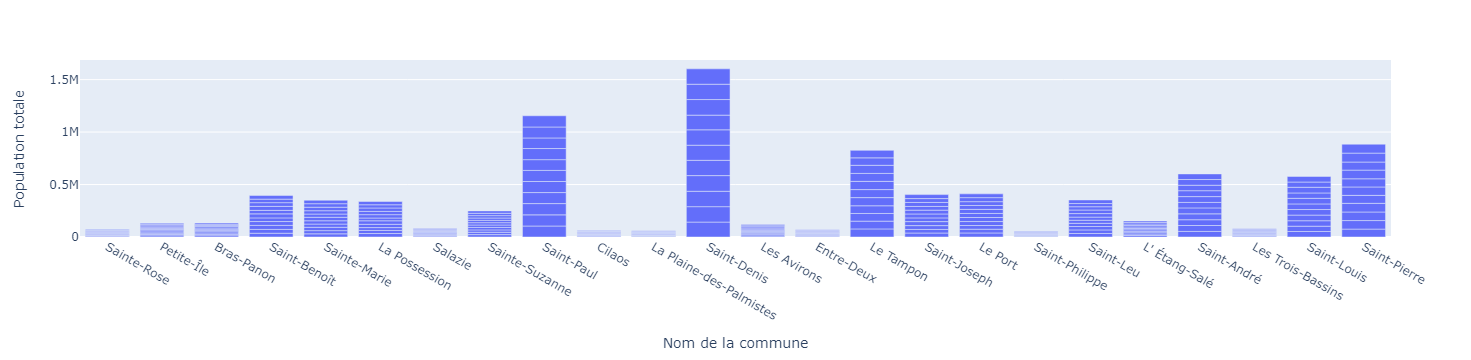

In [142]:
fig = px.bar(population, x="Nom de la commune", y="Population totale")
fig.show()


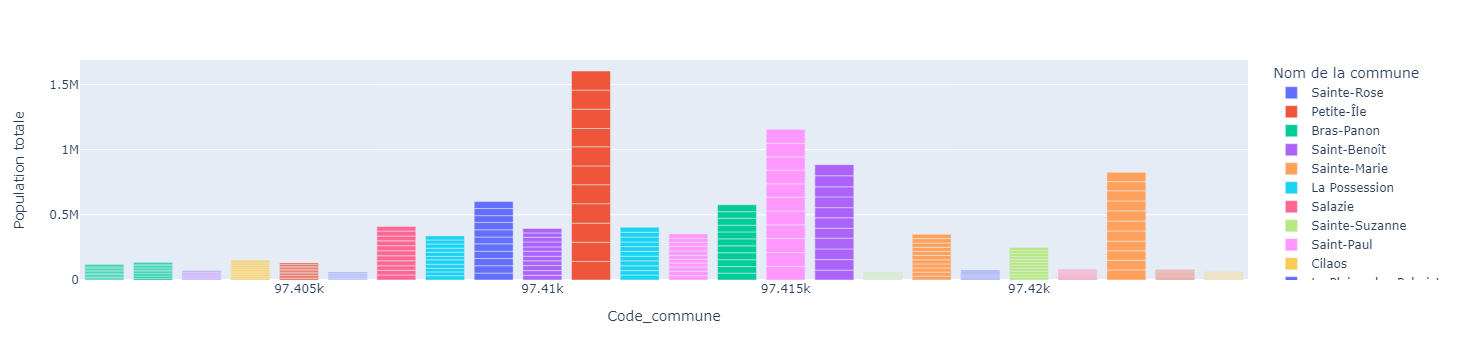

In [143]:
fig = px.bar(population, x="Code_commune", y="Population totale",color='Nom de la commune')
fig.show()

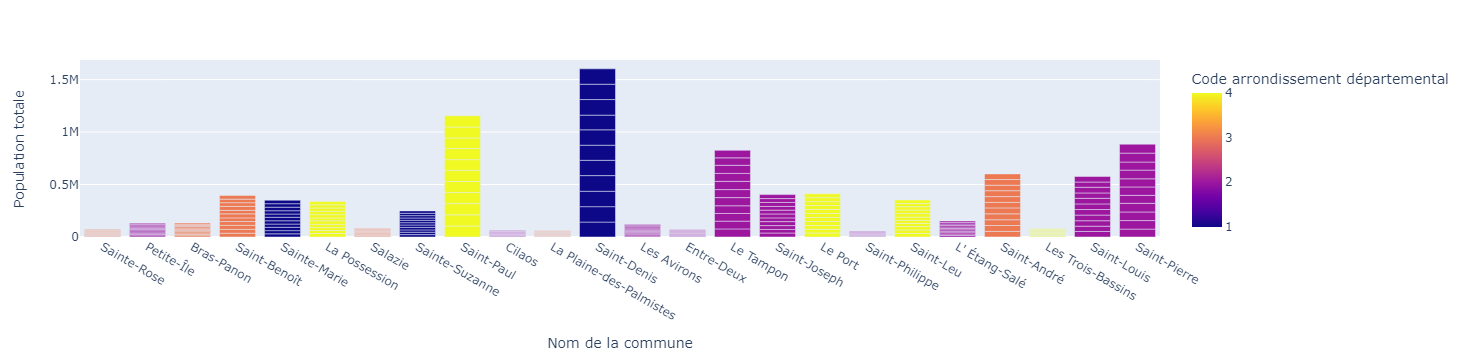

In [144]:
fig = px.bar(population, x="Nom de la commune", y="Population totale",color='Code arrondissement départemental')
fig.show()

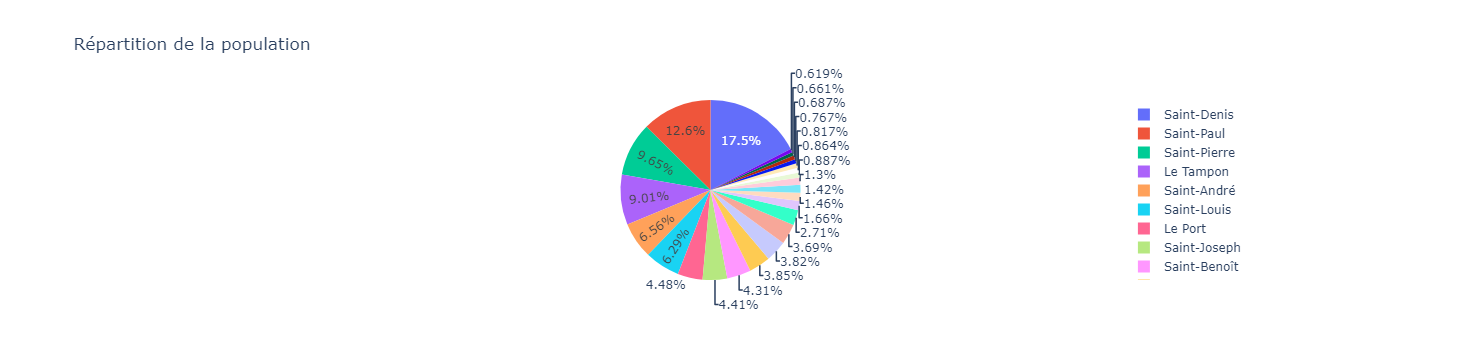

In [145]:
fig = px.pie(population, values='Population totale', names='Nom de la commune', title='Répartition de la population')
fig.show()

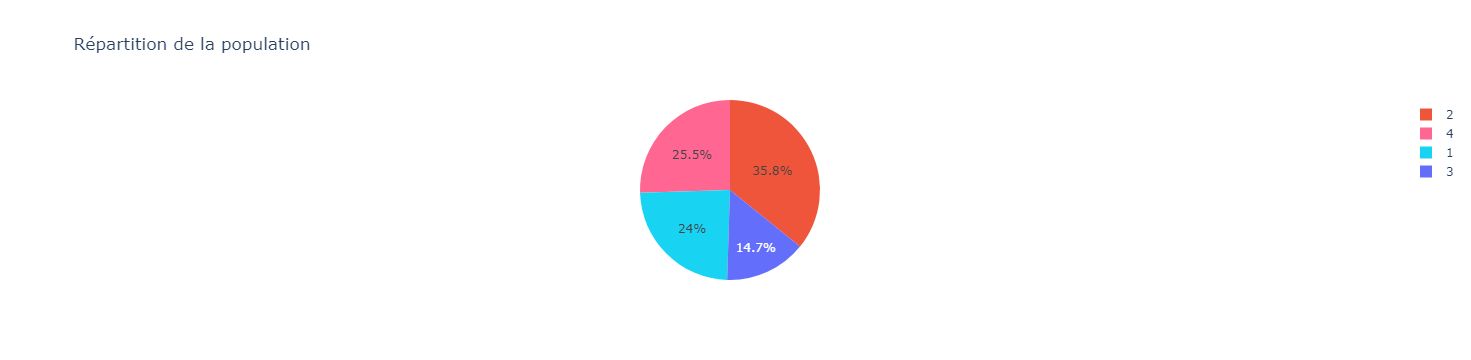

In [146]:
fig = px.pie(population, values='Population totale', names='Code arrondissement départemental', title='Répartition de la population', color='Code canton')
fig.show()

In [147]:
import plotly.graph_objects as go


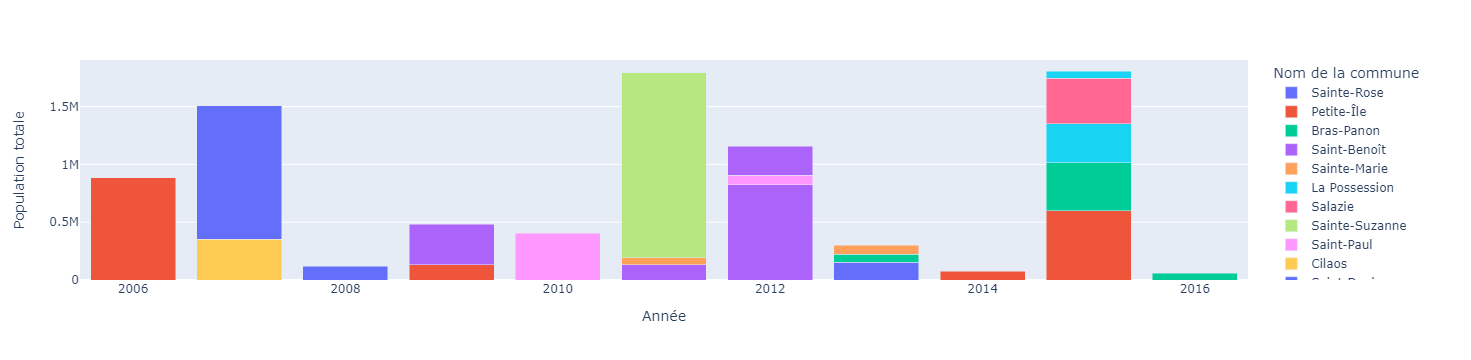

In [148]:
fig = px.bar(df6, x='Année', y='Population totale',barmode='stack',color='Nom de la commune')
fig.show()

In [151]:
df6

,Code_commune,Population totale,Nom de la commune,Année,NB inscrit PE,Nombre de Décès
0,97401,119538,Sainte-Rose,2008,169160,871
1,97402,133642,Petite-Île,2009,189530,1044
2,97403,70281,Bras-Panon,2013,112640,915
3,97404,152391,Sainte-Rose,2013,234050,1251
4,97405,130205,Saint-Benoît,2011,199790,1293
5,97406,60566,Sainte-Marie,2011,94970,492
6,97407,411129,Bras-Panon,2015,651610,3186
7,97408,337904,La Possession,2015,485870,1818
8,97409,601128,Petite-Île,2015,826780,4623
9,97410,394936,Salazie,2015,543970,8419


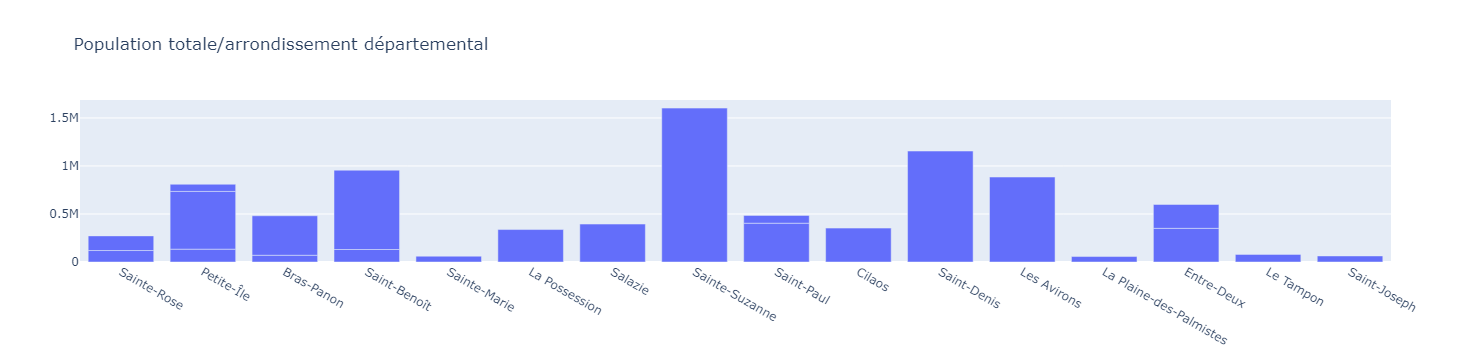

In [153]:
x = df6['Nom de la commune']
y = df6['Population totale']
# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['50 % Share', '20 % Share', '30 % Share'])])
fig.update_layout(title_text='Population totale/arrondissement départemental')
fig.show()

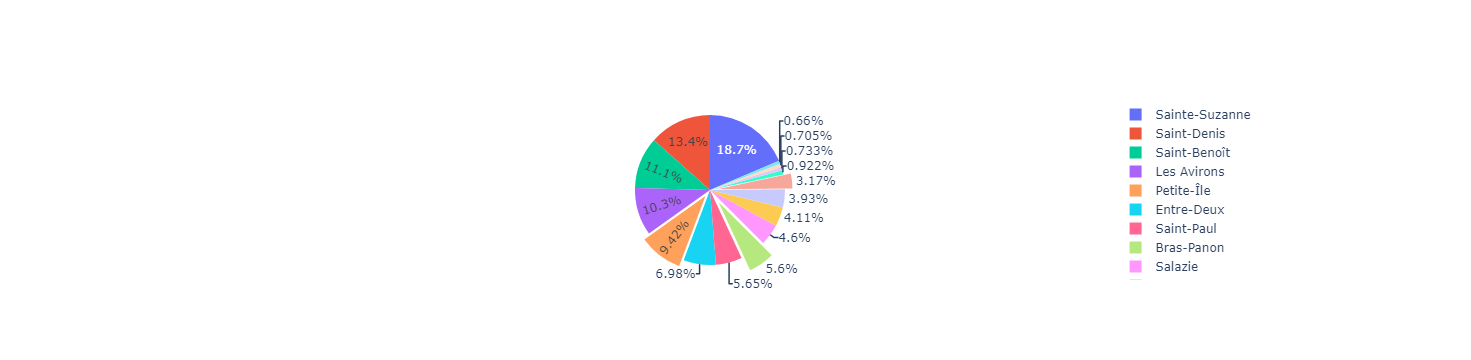

In [157]:
#donut chart
labels =df6['Nom de la commune']
values =df6['Population totale']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.2, 0.1])])
fig.show()

In [160]:
# liste des "Code Département"
codes10 = sorted(df6["Code_commune"].unique())
print(*codes4)

97101 97103 97105 97106 97107 97108 97109 97112 97113 97115 97116 97117 97118 97120 97124 97125 97126 97128 97129 97206 97207 97209 97210 97211 97213 97216 97217 97218 97219 97221 97222 97223 97224 97225 97226 97228 97230 97231 97233 97302 97304 97305 97307 97308 97309 97311 97313 97401 97402 97403 97404 97405 97406 97407 97408 97409 97410 97411 97412 97413 97414 97415 97416 97417 97418 97419 97420 97421 97422 97423 97424 97502 97602 97603 97605 97609 97610 97611 97612 97614 97615 97617 97801


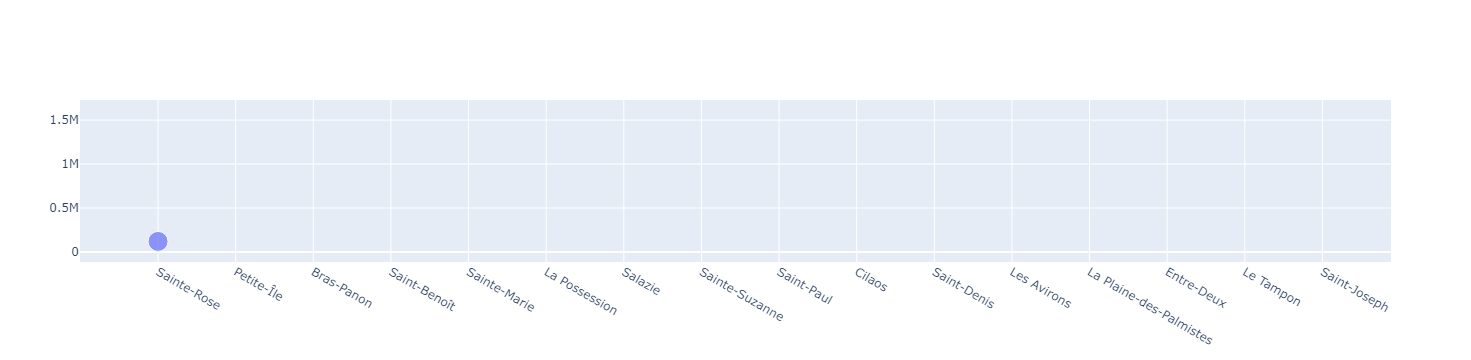

In [183]:
fig = go.Figure(data=[go.Scatter(
    x=df6['Nom de la commune'], 
    y=df6['Population totale'],
    mode='markers',
    marker_size=[20])
])
fig.show()

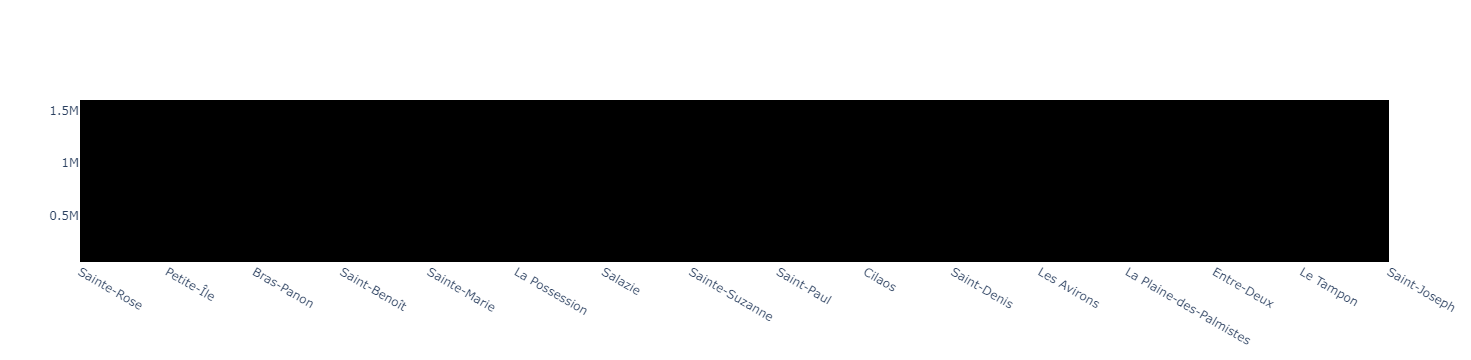

In [172]:
 #Create a bubble chart
fig = go.Figure(data=go.Scatter(x=df6['Nom de la commune'],
                                y=df6['Population totale'],
                                mode='markers',
                                marker=dict(size=df6['Population totale'],
                                            color=['red', 'blue', 'green', 'yellow', 'purple'],
                                            opacity=0.7)), layout=go.Layout(width=1000))

# Show the chart
fig.show()

In [205]:
df6

,Code_commune,Population totale,Nom de la commune,Année,NB inscrit PE,Nombre de Décès
0,97401,119538,Sainte-Rose,2008,169160,871
1,97402,133642,Petite-Île,2009,189530,1044
2,97403,70281,Bras-Panon,2013,112640,915
3,97404,152391,Sainte-Rose,2013,234050,1251
4,97405,130205,Saint-Benoît,2011,199790,1293
5,97406,60566,Sainte-Marie,2011,94970,492
6,97407,411129,Bras-Panon,2015,651610,3186
7,97408,337904,La Possession,2015,485870,1818
8,97409,601128,Petite-Île,2015,826780,4623
9,97410,394936,Salazie,2015,543970,8419


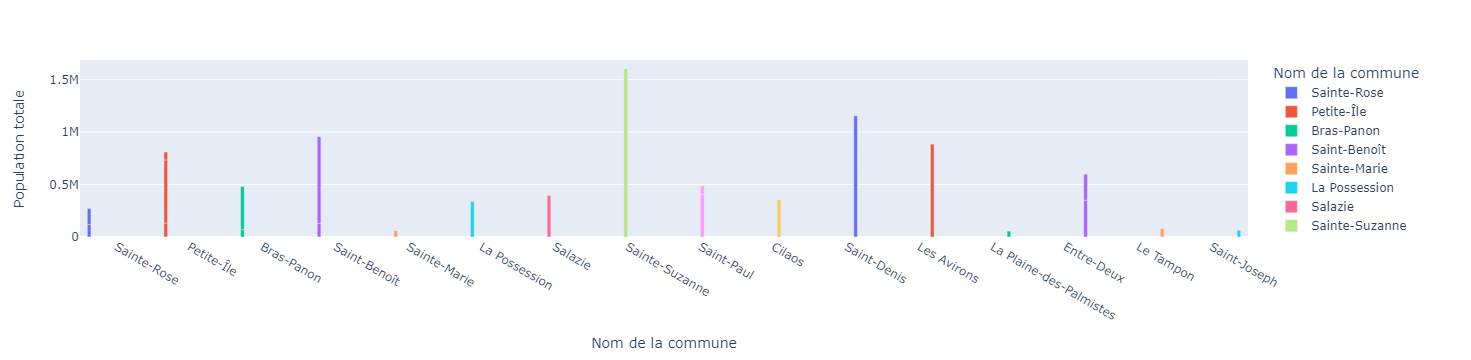

In [206]:
fig = px.bar(df6, x="Nom de la commune", y="Population totale", color="Nom de la commune", barmode="group")
fig.show()

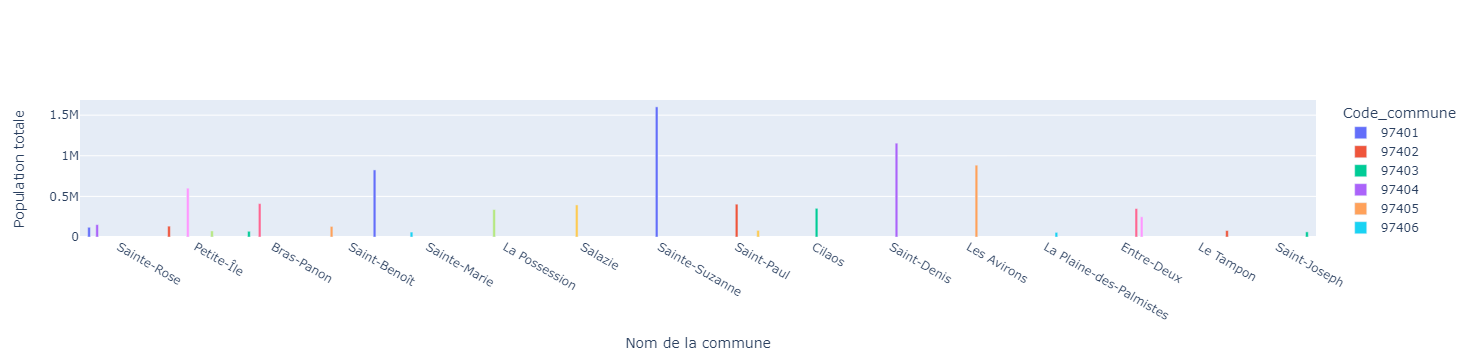

In [209]:
fig = go.Figure()
for Code_commune, group in df6.groupby("Code_commune"):
    fig.add_trace(go.Bar(x=group["Nom de la commune"], y=group["Population totale"], name=Code_commune,
      hovertemplate="Code commune=%s<br>Commne=%%{x}<br>Population=%%{y}<extra></extra>"% Code_commune))
fig.update_layout(legend_title_text = "Code_commune")
fig.update_xaxes(title_text="Nom de la commune")
fig.update_yaxes(title_text="Population totale")
fig.show()

In [211]:
from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])


In [212]:
app

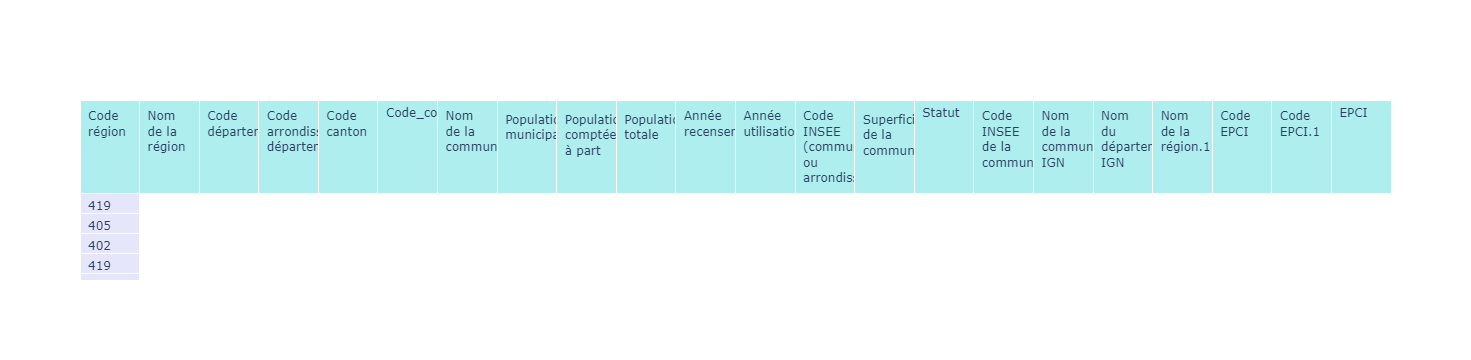

In [227]:
df7 = pd.read_csv('C:/Users/gael.lisador/Desktop/Hackathon/datavizreunion/population-francaise-communespublic.csv',encoding="ISO-8859-1",
                 sep="\t", na_values="-")

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df7.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df7.Code_commune],
               fill_color='lavender',
               align='left'))
])

fig.show()

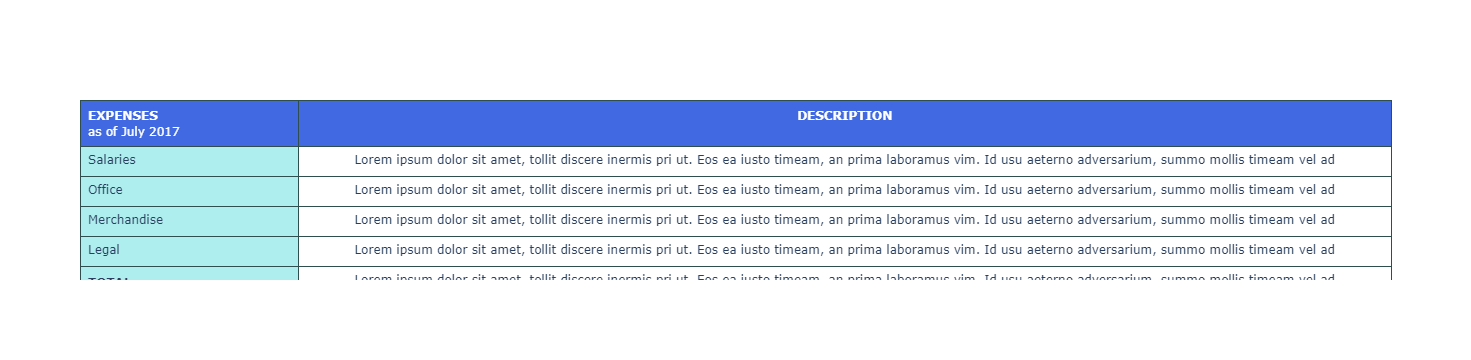

In [228]:
values = [['Salaries', 'Office', 'Merchandise', 'Legal', '<b>TOTAL<br>EXPENSES</b>'], #1st col
  ["Lorem ipsum dolor sit amet, tollit discere inermis pri ut. Eos ea iusto timeam, an prima laboramus vim. Id usu aeterno adversarium, summo mollis timeam vel ad",
  "Lorem ipsum dolor sit amet, tollit discere inermis pri ut. Eos ea iusto timeam, an prima laboramus vim. Id usu aeterno adversarium, summo mollis timeam vel ad",
  "Lorem ipsum dolor sit amet, tollit discere inermis pri ut. Eos ea iusto timeam, an prima laboramus vim. Id usu aeterno adversarium, summo mollis timeam vel ad",
  "Lorem ipsum dolor sit amet, tollit discere inermis pri ut. Eos ea iusto timeam, an prima laboramus vim. Id usu aeterno adversarium, summo mollis timeam vel ad",
  "Lorem ipsum dolor sit amet, tollit discere inermis pri ut. Eos ea iusto timeam, an prima laboramus vim. Id usu aeterno adversarium, summo mollis timeam vel ad"]]


fig = go.Figure(data=[go.Table(
  columnorder = [1,2],
  columnwidth = [80,400],
  header = dict(
    values = [['<b>EXPENSES</b><br>as of July 2017'],
                  ['<b>DESCRIPTION</b>']],
    line_color='darkslategray',
    fill_color='royalblue',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['paleturquoise', 'white']),
    align=['left', 'center'],
    font_size=12,
    height=30)
    )
])
fig.show()